# Hermite-Gauss determinantal point processes for MC integration

##### Author: [Nicholas B](mailto:nicholas92457@gchq.gov.uk).
##### Derived in no-small part from the work of [Guillaume Gautier](http://guilgautier.github.io/), [Rémi Bardenet](https://rbardenet.github.io/), and [Michal Valko](http://researchers.lille.inria.fr/~valko/hp/)

See also
- the [documentation](https://dppy.readthedocs.io/en/latest/continuous_dpps/multivariate_jacobi_ope.html) on ReadTheDocs
- the [NeurIPS'19 paper](https://guilgautier.github.io/publications/)
- the [ICML'19 workshop talk](https://guilgautier.github.io/publications/) (Workshop on Negative Dependence in ML)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling</a></span><ul class="toc-item"><li><span><a href="#Minimal-working-example" data-toc-modified-id="Minimal-working-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Minimal working example</a></span></li><li><span><a href="#Plot-a-sample-in-1D-or-2D" data-toc-modified-id="Plot-a-sample-in-1D-or-2D-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot a sample in 1D or 2D</a></span></li><li><span><a href="#Timing" data-toc-modified-id="Timing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Timing</a></span></li></ul></li><li><span><a href="#Numerical-integration" data-toc-modified-id="Numerical-integration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical integration</a></span><ul class="toc-item"><li><span><a href="#Estimators" data-toc-modified-id="Estimators-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Estimators</a></span></li><li><span><a href="#Integrands" data-toc-modified-id="Integrands-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Integrands</a></span></li><li><span><a href="#Estimation" data-toc-modified-id="Estimation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estimation</a></span></li><li><span><a href="#Variance-decay" data-toc-modified-id="Variance-decay-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Variance decay</a></span><ul class="toc-item"><li><span><a href="#Of-an-integrand-$f$" data-toc-modified-id="Of-an-integrand-$f$-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Of an integrand $f$</a></span></li><li><span><a href="#$f(x)-=-\sum_{k=0}^{M-1}-\frac{1}{k+1}-P_k(x)$" data-toc-modified-id="$f(x)-=-\sum_{k=0}^{M-1}-\frac{1}{k+1}-P_k(x)$-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>$f(x) = \sum_{k=0}^{M-1} \frac{1}{k+1} P_k(x)$</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [1]:
import multiprocessing as mp
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.integrate import quad
from sklearn.metrics import pairwise_distances
from tqdm import tqdm 
%config InlineBackend.figure_format='retina'

sys.path.append("..")
from hermitedpp.multivariate_hermite_factor_ope import MultivariateHermiteFactorOPE

## Sampling

### Minimal working example

In [2]:
d, N = 2, 30  # dimension / number of points

dpp = MultivariateHermiteFactorOPE(N, d)
dpp.sample()

array([[-2.96441174, -1.93447638],
       [-0.72778636,  1.37785423],
       [-2.01042795, -1.08068275],
       [-1.36918187, -3.45811152],
       [ 4.31049156,  1.99553752],
       [-2.45136809,  0.99828482],
       [ 0.7067647 ,  1.86061966],
       [-2.05113959, -3.17162561],
       [-0.49962252,  2.48105597],
       [ 2.08634567, -2.5034225 ],
       [ 2.9179008 , -1.89333487],
       [ 2.7539227 ,  3.98693514],
       [ 0.09543649,  1.0741905 ],
       [-2.5895102 ,  0.06147546],
       [ 2.49134064, -0.28349939],
       [ 5.01821756,  0.32976988],
       [ 1.31489599, -3.42178488],
       [ 1.68973386,  0.03875325],
       [-3.63553524, -1.18205512],
       [-0.31100306, -1.07063746],
       [ 1.40807128,  2.77961802],
       [-1.4047159 ,  2.03125405],
       [ 0.01420181, -3.30910778],
       [-0.65329438,  0.3822757 ],
       [ 1.82424092, -2.56834173],
       [ 1.50428331, -0.57122952],
       [-1.16518569,  3.58567858],
       [-3.1428268 ,  2.62766647],
       [ 0.89689118,

### Plot a sample in 1D or 2D

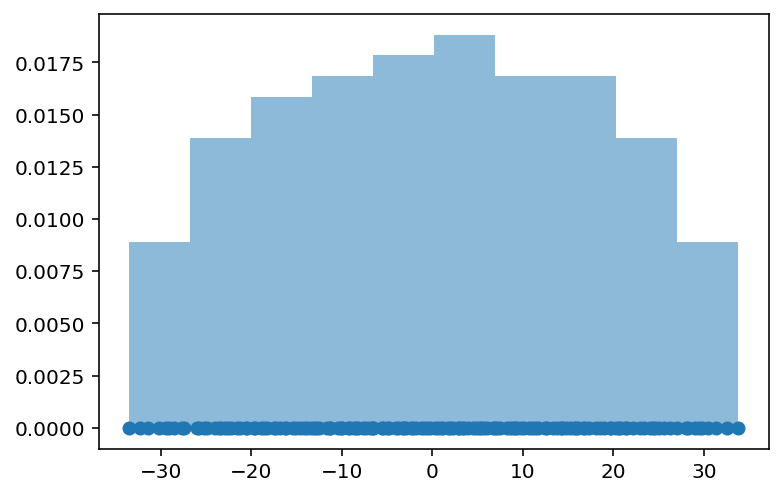

In [3]:
N, d = 150, 1
    
dpp = MultivariateHermiteFactorOPE(N, d)

sample = dpp.sample()

plt.scatter(sample[:, 0],
            np.zeros_like(sample[:, 0]))

w, _, __= plt.hist(sample[:, 0],
                   bins=10,
                   density=True,
                   orientation='vertical',
                   alpha=0.5)
plt.ylim([-.001, max(w) + 0.001]);

In [ ]:
N, d = 500, 2

dpp = MultivariateHermiteFactorOPE(N, d)

sample = dpp.sample()
plt.figure(figsize=(5,5))
plt.scatter(*sample.T);
plt.savefig("../paper/figures/2d_500pt_dpp_sample.pdf")

In [ ]:
sample = np.random.randn(N, d)
plt.figure(figsize=(5,5))
plt.scatter(*sample.T);
plt.savefig("../paper/figures/2d_500pt_iid_sample.pdf")

In [ ]:
sample = np.random.uniform(-np.power(N, 0.25)*2, np.power(N, 0.25)*2, size=(N, d))
plt.figure(figsize=(5,5))
plt.scatter(*sample.T);
plt.savefig("../paper/figures/2d_500pt_iid_uniform_sample.pdf")

### Timing

To get a quick idea of the time to get a sample you can run the following cell

In [ ]:
d, N = 2, 100
jac_params = 0.5 - np.random.rand(d, 2)

dpp = MultivariateHermiteFactorOPE(N, d)

%timeit dpp.sample()

## Numerical integration

### Estimators

In [4]:
def naive_estimator(integrand, dpp, sample=None):
    N = dpp.n_points 
    d = dpp.dim
    sample = stats.multivariate_normal(cov=np.eye(d)).rvs(N)
    return np.mean(integrand(sample)) * (2 * np.pi)**(d/2)

def BH_estimator(integrand, dpp, sample=None):
    if sample is not None:
        return np.sum(integrand(sample).ravel() / dpp.kernel(sample, eval_pointwise=True))
    
    else:
        sample = dpp.sample()
        return BH_estimator(integrand, dpp, sample)

def EZ_estimator(integrand, dpp, sample=None):
    if sample is not None:
        
        phi_x = dpp.eval_multiD_polynomials(sample)
        integrand_x = integrand(sample).ravel()

        EZ_estimator = np.linalg.solve(phi_x, integrand_x)[0]
        EZ_estimator *= np.sqrt(dpp.mass_of_mu)
        
        return EZ_estimator

    else:
        
        sample = dpp.sample()
        return EZ_estimator(integrand, dpp, sample)

def all_estimators(integrand, dpp, sample=None):
    if sample is not None:
        return naive_estimator(integrand, dpp), BH_estimator(integrand, dpp, sample), EZ_estimator(integrand, dpp, sample)
    
    else:
        np.random.seed(None)
        sample = dpp.sample()
        return both_estimators(integrand, dpp, sample)

### Integrands

In [ ]:
def bump_eps(X, eps=0.05):
    """
    https://en.wikipedia.org/wiki/Bump_function
    """

    if type(X) is float:
        f_x = np.exp(-1 / (1.0 - eps - X**2)) if abs(X) < np.sqrt(1 - eps) else 0.
        
    elif X.ndim == 1:
        in_I = np.abs(X) < np.sqrt(1 - eps)
        f_x = np.zeros(in_I.size)
        f_x[in_I] = np.exp(-1 / (1.0 - eps - X[in_I]**2))

    else:
        in_I = np.all(np.abs(X) < np.sqrt(1 - eps), axis=1)
        f_x = np.zeros(in_I.size)
        f_x[in_I] = np.exp(-np.sum(1.0 / (1.0 - eps - X[in_I]**2), axis=1))
    
    return f_x

def sine(X):

    if type(X) is float: 
        f_x = np.sin(np.pi*X)
    elif X.ndim == 1:
        f_x = np.sin(np.pi*X)
    else:
        f_x = np.prod(np.sin(np.pi*X), axis=-1)
    
    return f_x

def cosine(X):

    if type(X) is float: 
        f_x = np.cos(np.pi*X)
    elif X.ndim == 1:
        f_x = np.cos(np.pi*X)
    else:
        f_x = np.prod(np.cos(np.pi*X), axis=-1)
    
    return f_x

def absolute(X):
    if type(X) is float: 
        f_x = np.abs(X)
    elif X.ndim == 1:
        f_x = np.abs(X)
    else:
        f_x = np.prod(np.abs(X), axis=-1)
    
    return f_x

def heaviside(X, shift=0):
    
    if type(X) is float: 
        f_x = np.heaviside(X - shift, 0)
    elif X.ndim == 1:
        f_x = np.heaviside(X - shift, 0)
    else:
        f_x = np.prod(np.heaviside(X - shift, 0), axis=-1)
    
    return f_x

def mix(X):
    
    return 0.5 * (heaviside(X) - 0.5) * (cosine(X) + cosine(2*X) + sine(5*X))



### Estimation

In [ ]:
integrand = stats.norm.cdf

In [ ]:
d, N = 1, 50

dpp = MultivariateHermiteFactorOPE(N, d)

In [ ]:
sample = dpp.sample()

print('Estimation of the integral\n')
for lab, est in zip(['Naive', 'BH', 'EZ'], all_estimators(integrand, dpp, sample)):
    print(lab)
    print(est)
    
if d == 1:
    
    print('scipy quad')
    print(quad(lambda x: dpp.eval_w(x)*integrand(x), 
               -np.inf, np.inf)[0])

    tol = 1e-4
    X_ = np.linspace(-20, 20, 300)[:, None]

#     print('numpy trapz')
#     print(np.trapz(dpp.eval_w(X_)*integrand(X_),
#                    X_.ravel()))
    
    
    X_ = np.linspace(-20, 20, 300)[:, None]
    fig, ax = plt.subplots()
    ax.plot(X_, integrand(X_), label='f')
    ax.scatter(sample, np.zeros_like(sample), label='sample')
    ax.scatter(sample, integrand(sample), label='f(sample)')

###  Variance decay

##### To repeat the estimations, we use the package `multiprocessing` 
##### In this notebook, to estimate the variance of both BH and EZ estimators,
##### we draw $20$ samples with up to $N=100$ points for $d=1,2$ (by default)
##### You can change the parameters, but sampling may take some time

#### Of an integrand $f$

In [ ]:
def integrand(x):
    return bump_eps(x, eps=0.05)
#     return cosine(x)
#     return 2 * (heaviside(x) - 0.5)
#     return absolute(x)
#     return mix(x)

In [ ]:
dim_max = 3
nb_repeats = 20

var_results = dict()

for d in range(1, dim_max+1):
    print('dimension =', d)
    
    jac_params = -0.5 + np.random.rand(d, 2)
    jac_params[0, :] = -0.5
    if d == 1:
        N_min, N_max, N_step = 20, 100, 20
    else:
        N_min, N_max, N_step = 20, 100, 20
    
    var_results[(d,)] = jac_params
    
    for N in range(N_min, N_max+1, N_step):
        print('#points =', N)

        dpp = MultivariateJacobiOPE(N, jac_params)

        pool = mp.Pool(mp.cpu_count())

        results = pool.starmap(both_estimators, [(integrand, dpp) for _ in range(nb_repeats)])
        results = np.array(results)
        var_results[(d, N)] = np.var(results, axis=0)

        pool.close()

In [ ]:
j_par = {d: var_results.get((d, )) for d in range(1, dim_max + 1)}
var_N = {d: np.array([key[1] for key in var_results.keys() if len(key)==2 and key[0]==d])
            for d in range(1, dim_max + 1)}
var_res = {d: np.array([value for key, value in var_results.items() if len(key)==2 and key[0]==d]).T
            for d in range(1, dim_max + 1)}

cols = ['blue', 'green']
CB_cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markers = ['o', '^']
labels = ['BH', 'EZ']
for d in range(1, dim_max + 1):
    
    fig, ax = plt.subplots()
#     plt.title(r'Dimension $d={}$'.format(d), fontsize=20)
    ax.set_xlabel(r'$N$', fontsize=22)
    ax.xaxis.set_label_coords(0.98, -0.025)
    ax.set_ylabel(r'$\mathrm{\mathbb{V}}$ar', fontsize=22, rotation='horizontal')
    ax.yaxis.set_label_coords(-0.06, 0.94)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 17.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    for c, m, lab, var_estim in zip(CB_cols[:2], markers, labels, var_res[d]):

        ax.loglog(var_N[d], var_estim, m, c=c, markersize=8)

        x_plot = np.array([np.min(var_N[d]), np.max(var_N[d])])
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(var_N[d]), np.log(var_estim))
        lab += r' {:.1f}, {:.2f}'.format(slope, r_value**2)
        
        ax.loglog(x_plot, np.exp(intercept)*x_plot**slope, c=c, label=lab)
    
    leg = ax.legend(fontsize=20, frameon=False, handlelength=0.6, loc='lower left')

    for line in leg.get_lines():
        line.set_linewidth(4.0)

    plt.show()

#### $f(x) = \sum_{k=0}^{M-1} \frac{1}{k+1} P_k(x)$

$M=70$

EZ provides perfect estimation when $N\geq M$, see the drop in the variance plot

In [ ]:
dim_max = 3
nb_repeats = 20

M = 50
N_min, N_max, N_step = 40, 100, 10

var_results = dict()

for d in range(1, dim_max+1):
    print('dimension =', d)
    
    coefs = 1.0 / np.arange(1, dp + 1)
    
    def f_gp(X):
        return np.sum(coefs*dpp_gp.eval_multiD_polynomials(X), axis=-1)
    
    for N in range(N_min, N_max+1, N_step):
        print('#points =', N)

        dpp = MultivariateJacobiOPE(N, jac_params)

        pool = mp.Pool(mp.cpu_count())

        results = pool.starmap(both_estimators, [(f_gp, dpp) for _ in range(nb_repeats)])
        results = np.array(results)
        var_results[(d, N)] = np.var(results, axis=0)

        pool.close()

In [ ]:
j_par = {d: var_results.get((d, )) for d in range(1, dim_max + 1)}
var_N = {d: np.array([key[1] for key in var_results.keys() if len(key)==2 and key[0]==d])
            for d in range(1, dim_max + 1)}
var_res = {d: np.array([value for key, value in var_results.items() if len(key)==2 and key[0]==d]).T
            for d in range(1, dim_max + 1)}


CB_cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markers = ['o', '^']
labels = ['BH', 'EZ']
for d in range(1, dim_max + 1):
    
    fig, ax = plt.subplots()
    plt.title(r'Dimension $d={}$, $M$ = {}'.format(d, M), fontsize=20)
    ax.set_xlabel(r'$N$', fontsize=22)
    ax.xaxis.set_label_coords(1.03, -0.0)
    ax.set_ylabel(r'$\mathrm{\mathbb{V}}$ar', fontsize=22, rotation='horizontal')
    ax.yaxis.set_label_coords(-0.06, 0.95)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 17.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for c, m, lab, var_estim in zip(CB_cols[:2], markers, labels, var_res[d]):

        ax.loglog(var_N[d], var_estim, m, c=c, markersize=8)

        x_plot = np.array([np.min(var_N[d]), np.max(var_N[d])])
        
        if lab == 'BH':
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(var_N[d]), np.log(var_estim))
            lab += r' {:.1f}, {:.2f}'.format(slope, r_value**2)
        
            ax.loglog(x_plot, np.exp(intercept)*x_plot**slope, c=c, label=lab)
        
    leg = ax.legend(fontsize=20, frameon=False, handlelength=0.6, loc='lower left')

    for line in leg.get_lines():
        line.set_linewidth(4.0)
        
    plt.show()

In [ ]:
from itertools import product
from scipy.special import factorial2

## Estimation of polynomial integrals

Consider polynomials functions of the form $$ f(x) = \sum_{i_1, \ldots, i_d=1}^p a_{\vec{i}} \prod_{k=1}^d x_k^{i_k}.$$

We will generate the coefficients randomly. The integrals can be computed exactly: 
$$ \int dx f(x) e^{-x^2/2} = (2\pi)^{d/2} \sum_{i_1, \ldots, i_d=1}^p a_{\vec{i}}  \prod_{k=1}^d m(i_k) $$
where $m(i) = (i-1)!!$ if $i$ even and $m(i) = 0$ otherwise.

In [ ]:
def moment(p):
    _p = np.asarray(p)
    return factorial2(_p-1) * (1 - _p % 2)

def random_multivariate_polynomial(dim, degree):
    coeffs = np.random.randn(*([degree+1, ]*dim))
    def poly(x):
        return sum(np.prod(x**np.array(inds), axis=-1) * coeffs[inds] for inds in product(range(degree+1), repeat=dim))
    true_integral = sum(np.prod(moment(inds)) * coeffs[inds] for inds in product(range(degree+1), repeat=dim)) * (2*np.pi)**(dim/2)
    return poly, true_integral

In [ ]:
dim = 2
poly, true = random_multivariate_polynomial(dim, 4)


In [ ]:
dim = 1
degree = 10
poly, true = random_multivariate_polynomial(dim, degree)

Ns = np.linspace(15, 100, 10).astype(int)
naives, BHs, EZs = [], [], []
for N in Ns:
    sn, sb, se = [], [], []
    for _ in range(50):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(poly, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)

plt.plot(Ns, np.mean(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.mean(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.mean(EZs, axis=-1), marker="^", label="EZ");
plt.plot(Ns, np.ones_like(Ns)*true, "k--", label="true");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly1d-mean.pdf")
plt.figure()
plt.plot(Ns, np.std(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.std(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.std(EZs, axis=-1), marker="^", label="EZ");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly1d-std.pdf")

In [ ]:
from tqdm.autonotebook import tqdm

In [ ]:
dim = 2
degree = 5
poly, true = random_multivariate_polynomial(dim, degree)

Ns = np.linspace(10, 100, 10).astype(int)
naives, BHs, EZs = [], [], []
for N in tqdm(Ns):
    sn, sb, se = [], [], []
    for _ in range(30):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(poly, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)


plt.plot(Ns, np.mean(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.mean(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.mean(EZs, axis=-1), marker="^", label="EZ");
plt.plot(Ns, np.ones_like(Ns)*true, "k--", label="true");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly2d-mean.pdf")
plt.figure()
plt.plot(Ns, np.std(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.std(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.std(EZs, axis=-1), marker="^", label="EZ");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly2d-std.pdf")

In [ ]:
dim = 3
degree = 5
poly, true = random_multivariate_polynomial(dim, degree)

Ns = np.linspace(100, 300, 25).astype(int)
naives, BHs, EZs = [], [], []
for N in tqdm(Ns):
    sn, sb, se = [], [], []
    for _ in range(30):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(poly, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)


plt.plot(Ns, np.mean(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.mean(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.mean(EZs, axis=-1), marker="^", label="EZ");
plt.plot(Ns, np.ones_like(Ns)*true, "k--", label="true");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly3d-mean.pdf")
plt.figure()
plt.plot(Ns, np.std(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.std(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.std(EZs, axis=-1), marker="^", label="EZ");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly3d-std.pdf")

In [ ]:
plt.plot(Ns[4:], np.mean(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.mean(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.mean(EZs, axis=-1), marker="^", label="EZ");
plt.plot(Ns, np.ones_like(Ns)*true, "k--", label="true");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly3d-mean.pdf")
plt.figure()
plt.plot(Ns, np.std(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.std(BHs, axis=-1), marker="o", label="BH");
plt.plot(Ns, np.std(EZs, axis=-1), marker="^", label="EZ");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/poly3d-std.pdf")

## Gaussian process posterior 

#### RBF kernel

In [ ]:
dim = 2

integrand = lambda x: np.exp(-np.sum(1/x**2, axis=-1))
dpp = MultivariateHermiteFactorOPE(100, dim)
true = (quad(lambda x: np.sqrt(2*np.pi)*stats.norm.pdf(x)*integrand(x), -np.inf, np.inf)[0])**2

Ns = np.linspace(50, 500, 7).astype(int)
naives, BHs, EZs = [], [], []
for N in tqdm(Ns):
    sn, sb, se = [], [], []
    for _ in tqdm(range(10)):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(integrand, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)



In [ ]:
def outlier_filter(arr):
    cutoff = np.quantile(np.abs(arr), 0.95)
    return arr[np.abs(arr)<cutoff]

fEZs = [outlier_filter(ez) for ez in EZs]
fBHs = [outlier_filter(bh) for bh in BHs]

In [ ]:
plt.plot(Ns, np.mean(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.mean(fBHs, axis=-1), marker="o", label="BH");
plt.plot(Ns[:-1], np.mean(fEZs, axis=-1)[:-1], marker="^", label="EZ");
plt.plot(Ns, np.ones_like(Ns)*true, "k--", label="true");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/rbf2d-mean.pdf")
plt.figure()
plt.plot(Ns, np.std(naives, axis=-1), marker="x", label="naive");
plt.plot(Ns, np.std(fBHs, axis=-1), marker="o", label="BH");
plt.plot(Ns[:-1], np.std(fEZs, axis=-1)[:-1], marker="^", label="EZ");
plt.xlabel("$N$");
plt.legend();
plt.savefig("../paper/figures/rbf2d-std.pdf")

#### Actual GP

Here we will consider a Gaussian process posterior on a simple synthetic dataset. We will use a scaled RBF kernel:

$$ k(x, x') = v \exp\left(-\frac{(x - x)^2}{l^2}\right)$$

where $v>0$ and $l>0$ are hyperparameters. As in GPyTorch, these hyperparameters are written as softplus transforms of raw hyperparameters to keep them positive:

$$v = \log(\exp(\theta_1) + 1), ~~~l = \log(\exp(\theta_2) + 1).$$

We place a Gaussian over the raw hyperparameters $\theta$. For demonstration purposes, we will take a unit variance factorised Gaussian centred on the point-estimate raw-hyperparameters from applying maringal likelihood maximisation. This is not dissimilar to a Laplace approximation of a posterior over the hyperparameters, though the variance is certainly not correct.

We here use an explicit implementation of an exact GP posterior rather than a framework like Vanguard or GPyTorch. This is for simplicity of exposition and to avoid cluttering this library with significant orthogonal GP specific code.

In [9]:
from sklearn.metrics import pairwise_distances
from vanguard.datasets.synthetic import SyntheticDataset
from vanguard.kernels import ScaledRBFKernel
from vanguard.vanilla import GaussianGPController

First generate some simple synthetic data, fit a standard GP and plot the posterior predictive on the test set.

In [14]:
dset = SyntheticDataset()

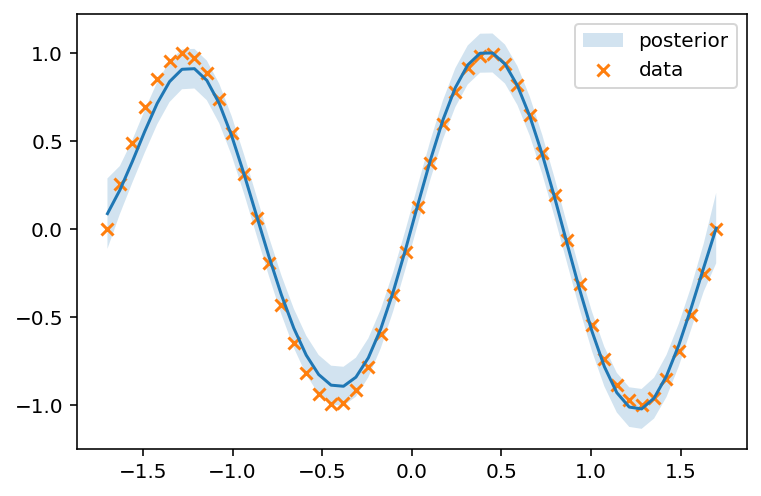

In [17]:
gp = GaussianGPController(train_x=dset.train_x, train_y=dset.train_y,
                          y_std=dset.train_y_std, kernel_class=ScaledRBFKernel)
gp.fit()
raw_ls = gp.kernel.base_kernel.raw_lengthscale.item()
raw_os = gp.kernel.raw_outputscale.item()

mean, lower, upper = gp.posterior_over_point(dset.test_x).confidence_interval()
plt.plot(dset.test_x.ravel(), mean)
plt.fill_between(dset.test_x.ravel(), lower, upper, alpha=0.2, label='posterior')
plt.scatter(dset.test_x, dset.test_y, marker='x', label='data');
plt.legend()
plt.savefig("../paper/figures/gp2d_point_est_posterior.pdf")

The following cell implements the GP posterior mean and covariance explicitly, (see [Rasmussen and Williams](http://www.gaussianprocess.org/gpml/)).

The function takes the raw hyperparameters $\theta$ as argument and returns the GP posterior mean and pointwise variance on the test set.

In [21]:
def posterior_mean_and_var_2d(theta):
    tx = dset.train_x
    ty = dset.train_y
    xstar = dset.test_x
    etheta = np.log(np.exp(np.expand_dims(np.expand_dims(theta[:, 0], -1), -1)*1 + raw_ls) + 1)
    econst = np.expand_dims(np.expand_dims(np.log(np.exp(theta[:, 1] + raw_os)*1 + 1), -1), -1)
    
    xx_dist = np.expand_dims(pairwise_distances(tx), 0)
    xstar_x_dist = np.expand_dims(pairwise_distances(xstar, tx), 0)
    xstar_xstar_dist = np.expand_dims(pairwise_distances(xstar, xstar), 0)
    
    kxx = econst * np.exp(-xx_dist/etheta) + dset.train_y_std**2
    kxstarx = econst * np.exp(-xstar_x_dist/etheta)
    kinv = np.linalg.inv(kxx)
    kxstarxstar = econst * np.exp(-xstar_xstar_dist**2/etheta)

    mean = kxstarx @ kinv @ ty
    cov = kxstarxstar - np.einsum("...ik,...kl,...jl->...ij", kxstarx, kinv, kxstarx)
    var = cov[:, np.arange(len(xstar)), np.arange(len(xstar))]
    return np.stack([mean, var], axis=-1)

Here we slightly modify the estimators from above. They are all mathematically the same as before, we just have to refactor them to allow broadcasting over leading dimensions.

In [19]:
def naive_estimator(integrand, dpp, sample=None):
    N = dpp.n_points 
    d = dpp.dim
    sample = stats.multivariate_normal(cov=np.eye(d)).rvs(N)
    return np.mean(integrand(sample), axis=0)

def BH_estimator(integrand, dpp, sample=None):
    if sample is not None:
        denom = np.expand_dims(np.expand_dims(dpp.kernel(sample, eval_pointwise=True), -1), -1)
        return np.sum(integrand(sample) / denom, axis=0)/(2*np.pi)**(sample.shape[1]/2)
    
    else:
        sample = dpp.sample()
        return BH_estimator(integrand, dpp, sample)

def EZ_estimator(integrand, dpp, sample=None):
    if sample is not None:
        
        phi_x = np.expand_dims(np.expand_dims(dpp.eval_multiD_polynomials(sample), 0), 0)
        integrand_x = integrand(sample)
        integrand_x = np.transpose(integrand_x, (1, 2, 0))
        phi_x = np.repeat(phi_x, integrand_x.shape[0], axis=0)
        phi_x = np.repeat(phi_x, integrand_x.shape[1], axis=1)
        estimate = np.linalg.solve(phi_x, integrand_x)[..., 0]
        estimate *= np.sqrt(dpp.mass_of_mu)
        return estimate/(2*np.pi)**(sample.shape[1]/2)
    else:
        sample = dpp.sample()
        return EZ_estimator(integrand, dpp, sample)

def all_estimators(integrand, dpp, sample=None):
    if sample is not None:
        return naive_estimator(integrand, dpp), BH_estimator(integrand, dpp, sample), EZ_estimator(integrand, dpp, sample)
    
    else:
        np.random.seed(None)
        sample = dpp.sample()
        return both_estimators(integrand, dpp, sample)

We now seek the hyperparameter-marginalised GP posterior confidence intervals. The pointwise CDF is

$$ \Psi(y) = \int d\theta ~ \Phi\left(\frac{y - \mu(\theta + \theta_*)}{\sigma(\theta + \theta_*)}\right) \frac{e^{-\frac{\theta^2}{2}}}{2\pi} $$

where $\theta_*$ the the centre of the raw-hyperparameter Gaussian obtained from MLL maximisiation and $\mu,\sigma$ are the pointwise posterior mean and standard deviation of the GP posterior as a function of $\theta$. There is an implicit dependence throughout on the index point $x$.


We then seek $y_2 = \Psi^{-1}(0.975), ~ y_1 = \Psi^{-1}(0.025)$, the boundaries of a confidence interval. Rather than embarking on numerical inversion of $\Psi$, we will opt for simpler heuristics that nevertheless demonstrate the DPP MC integration methods, which is our objective.

We will compute $$\bar{\mu} = \int d\theta ~ \frac{e^{-\frac{\theta^2}{2}}}{2\pi}  \mu(\theta + \theta_*)$$

and $$\bar{\sigma} = \int d\theta ~ \frac{e^{-\frac{\theta^2}{2}}}{2\pi}  \sigma(\theta + \theta_*).$$

These yield pseudo posterior confidence intervals $(\bar{\mu} - 1.96\bar{\sigma}, \bar{\mu}+1.96\bar{\sigma})$.

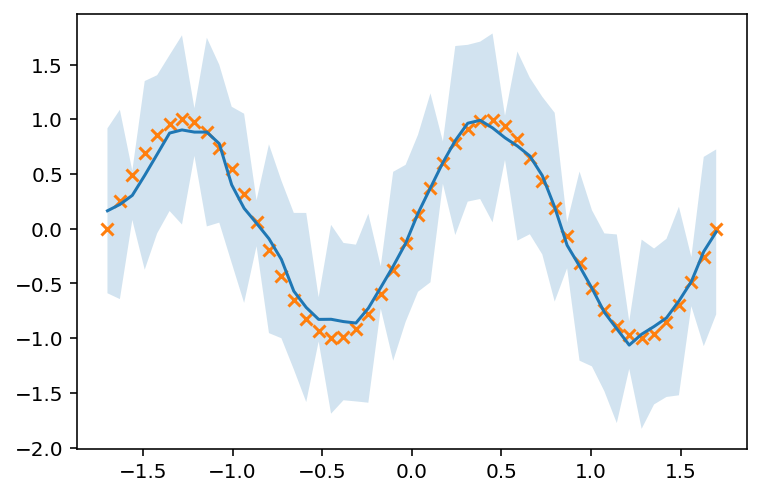

In [23]:
dpp = MultivariateHermiteFactorOPE(100, 2)
out = naive_estimator(posterior_mean_and_var_2d, dpp)
upper = out[:, 0] + 1.96*np.sqrt(out[:, 1])
lower = out[:, 0] - 1.96*np.sqrt(out[:, 1])
plt.plot(dset.test_x.ravel(), out[:, 0])
plt.fill_between(dset.test_x.ravel(), lower, upper, alpha=0.2)
plt.scatter(dset.test_x, dset.test_y, marker='x');

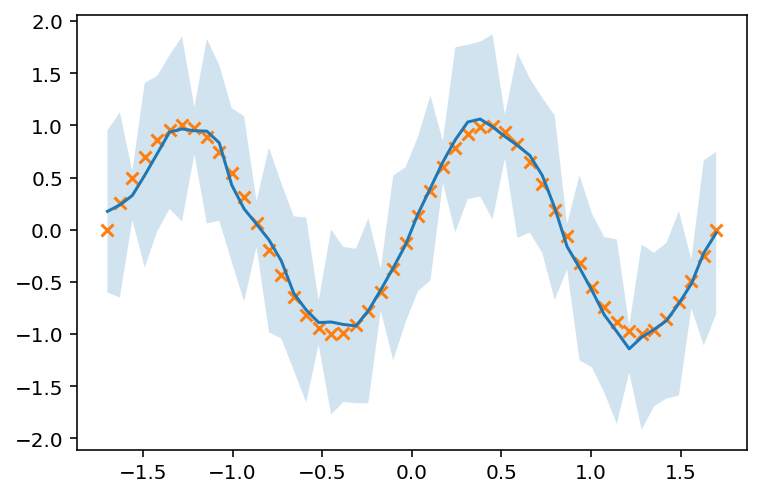

In [24]:
dpp = MultivariateHermiteFactorOPE(100, 2)
sample = dpp.sample()
out = BH_estimator(posterior_mean_and_var_2d, dpp, sample=sample)
upper = out[:, 0] + 1.96*np.sqrt(out[:, 1])
lower = out[:, 0] - 1.96*np.sqrt(out[:, 1])
plt.plot(dset.test_x.ravel(), out[:, 0])
plt.fill_between(dset.test_x.ravel(), lower, upper, alpha=0.2)
plt.scatter(dset.test_x, dset.test_y, marker='x');

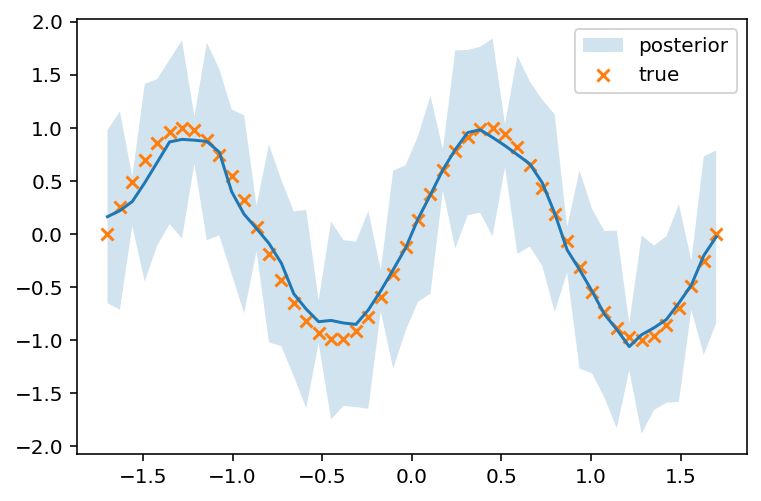

In [25]:
dpp = MultivariateHermiteFactorOPE(100, 2)
sample = dpp.sample()
out = EZ_estimator(posterior_mean_and_var_2d, dpp, sample=sample)
upper = out[:, 0] + 1.96*np.sqrt(out[:, 1])
lower = out[:, 0] - 1.96*np.sqrt(out[:, 1])
plt.plot(dset.test_x.ravel(), out[:, 0])
plt.fill_between(dset.test_x.ravel(), lower, upper, alpha=0.2, label="posterior")
plt.scatter(dset.test_x, dset.test_y, marker='x', label="true");
plt.legend()
plt.savefig("../paper/figures/gp2d_ez_posterior.pdf")

In [26]:
dim = 2

integrand = posterior_mean_and_var_2d

Ns = np.linspace(50, 300, 7).astype(int)
naives, BHs, EZs = [], [], []
for N in tqdm(Ns):
    sn, sb, se = [], [], []
    for _ in range(30):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(integrand, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [15:16<00:00, 130.91s/it]


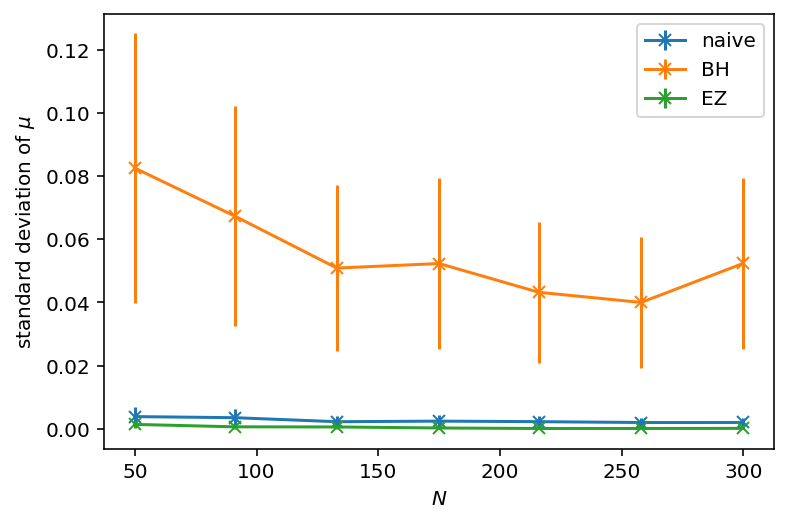

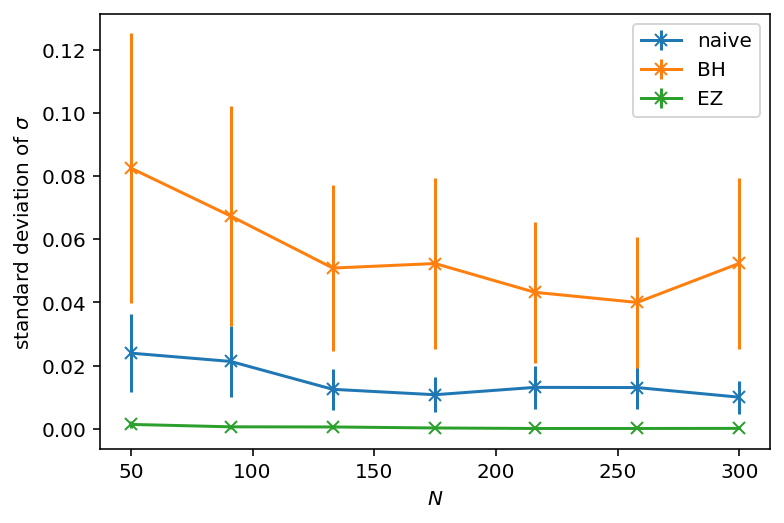

In [27]:
def std_of_mean(arr):
    return np.std(arr[..., 0], axis=1)

def std_of_std(arr):
    return np.std(arr[..., 1], axis=1)

std = std_of_mean(naives)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="naive")
std = std_of_mean(BHs)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="BH")
std = std_of_mean(EZs)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="EZ")
plt.xlabel("$N$");
plt.ylabel("standard deviation of $\mu$");
plt.legend();
plt.savefig("../paper/figures/gp2d-mean.pdf")

plt.figure()
std = std_of_std(naives)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="naive")
std = std_of_mean(BHs)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="BH")
std = std_of_mean(EZs)
plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="EZ")
plt.xlabel("$N$");
plt.ylabel("standard deviation of $\sigma$");
plt.legend();
plt.savefig("../paper/figures/gp2d-mean.pdf")

As a final test, we will use the point-estimate GP posterior confidence interval to guide some values $y_1, y_2,\ldots$ for which we will then estimate $\Psi(y_i)$.

In [28]:
mean, cov = gp.posterior_over_point(dset.test_x).prediction()
std = np.sqrt(np.diag(cov))
cdf_sigmas = [-4, -1.96, -1, 0, 1, 1.96, 4][::-1]
cdf_eval_points = np.array([mean + sigma*std for sigma in cdf_sigmas])

In [31]:
def posterior_cdf_vals_2d(theta):
    tx = dset.train_x
    ty = dset.train_y
    xstar = dset.test_x
    etheta = np.log(np.exp(np.expand_dims(np.expand_dims(theta[:, 0], -1), -1)*1 + raw_ls) + 1)
    econst = np.expand_dims(np.expand_dims(np.log(np.exp(theta[:, 1] + raw_os)*1 + 1), -1), -1)
    
    xx_dist = np.expand_dims(pairwise_distances(tx), 0)
    xstar_x_dist = np.expand_dims(pairwise_distances(xstar, tx), 0)
    xstar_xstar_dist = np.expand_dims(pairwise_distances(xstar, xstar), 0)
    
    kxx = econst * np.exp(-xx_dist/etheta) + dset.train_y_std**2
    kxstarx = econst * np.exp(-xstar_x_dist/etheta)
    kinv = np.linalg.inv(kxx)
    kxstarxstar = econst * np.exp(-xstar_xstar_dist**2/etheta)

    mean = kxstarx @ kinv @ ty
    cov = kxstarxstar - np.einsum("...ik,...kl,...jl->...ij", kxstarx, kinv, kxstarx)
    std = np.sqrt(cov[:, np.arange(len(xstar)), np.arange(len(xstar))])
    
    mean = np.expand_dims(mean, axis=1)
    std = np.expand_dims(std, axis=1)
    z = (np.expand_dims(cdf_eval_points, axis=0) - mean) / std
    return stats.norm.cdf(z)

In [32]:
dim = 2

integrand = posterior_cdf_vals_2d

Ns = np.linspace(50, 300, 7).astype(int)
naives, BHs, EZs = [], [], []
for N in tqdm(Ns):
    sn, sb, se = [], [], []
    for _ in range(30):
        dpp = MultivariateHermiteFactorOPE(N, dim)
        sample = dpp.sample()
        n, b, e = all_estimators(integrand, dpp, sample)
        sn.append(n)
        sb.append(b)
        se.append(e)
    naives.append(sn)
    BHs.append(sb)
    EZs.append(se)
naives = np.array(naives)
BHs = np.array(BHs)
EZs = np.array(EZs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [17:34<00:00, 150.61s/it]


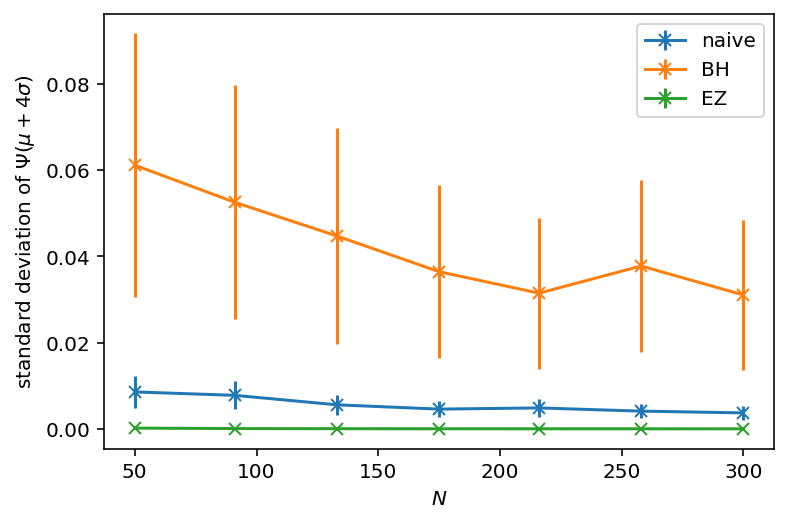

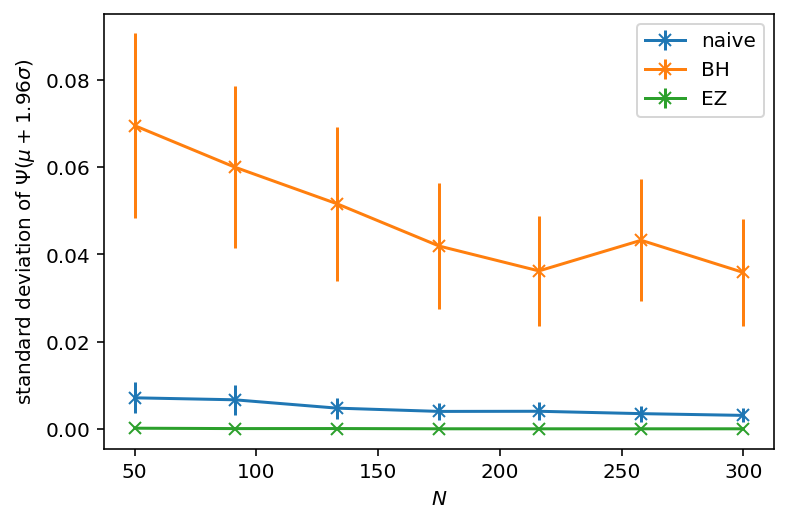

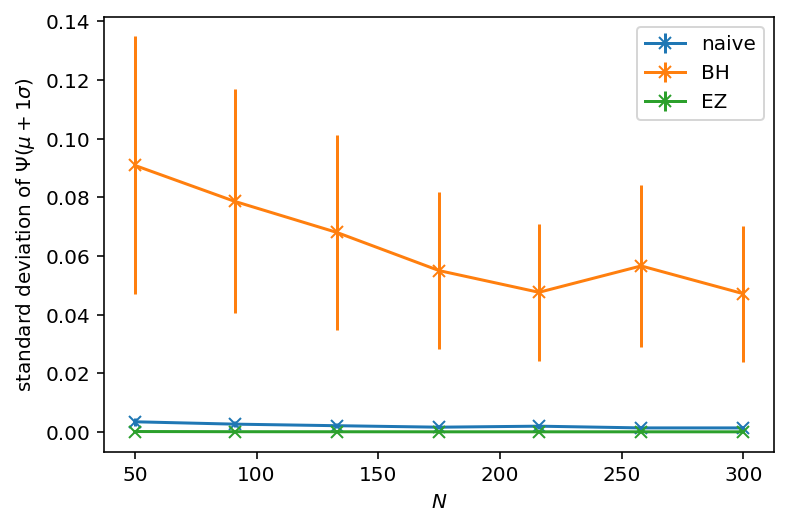

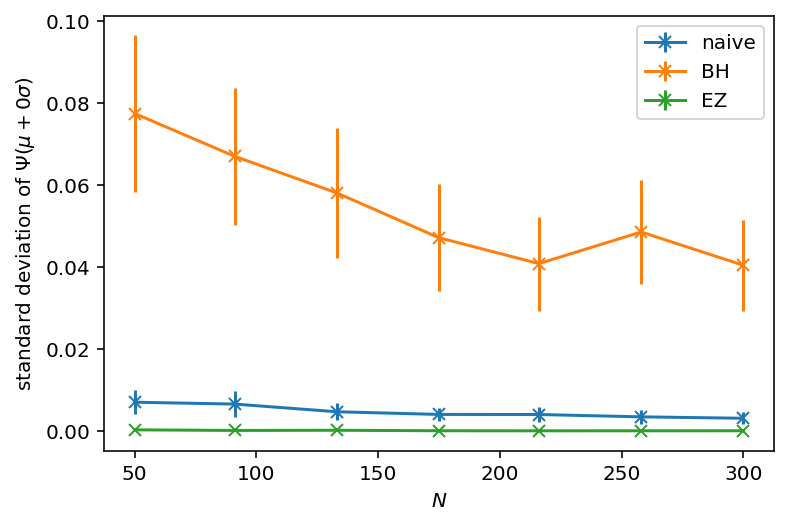

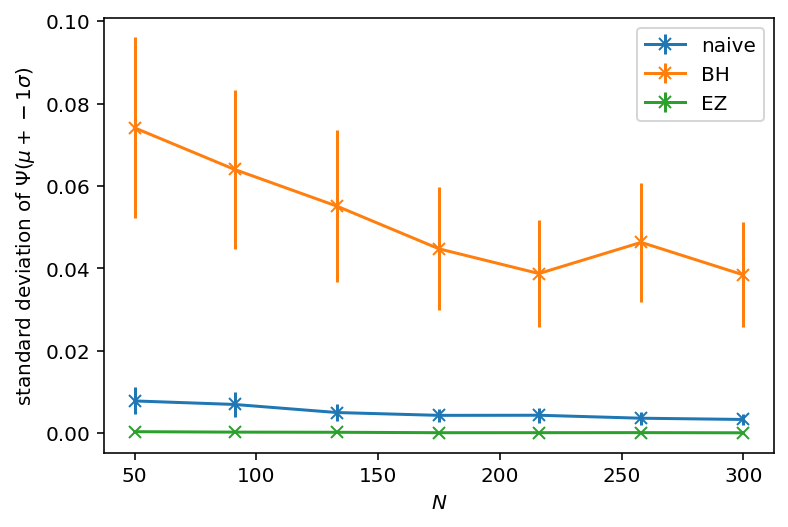

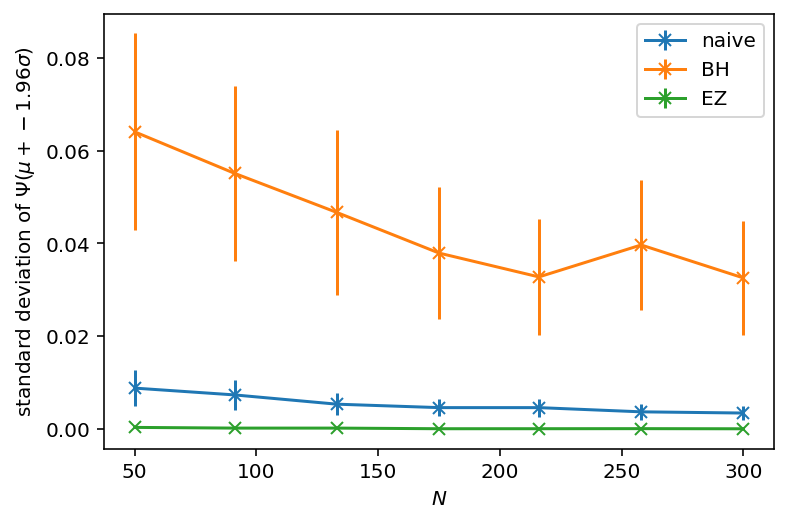

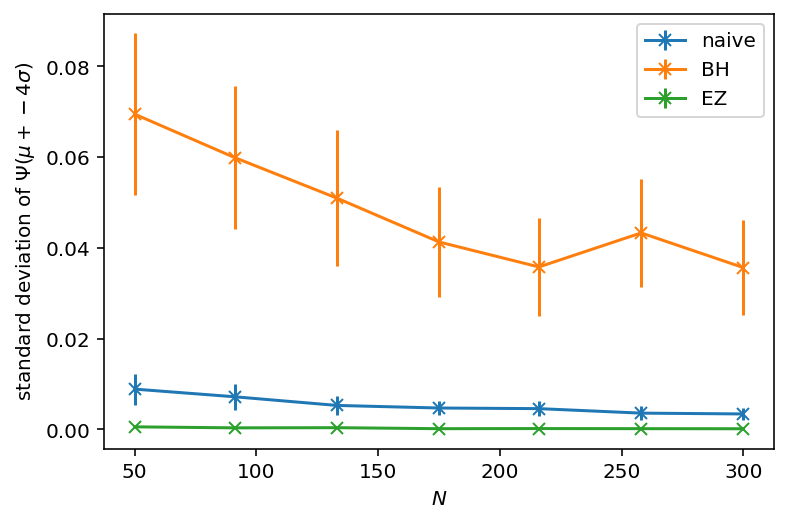

In [35]:
def std_of_quant(arr, ind):
    return np.std(arr[..., ind], axis=1)

for ind, yval in enumerate(cdf_sigmas):
    plt.figure()
    std = std_of_quant(naives, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="naive")
    std = std_of_quant(BHs, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="BH")
    std = std_of_quant(EZs, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="EZ")
    plt.xlabel("$N$");
    plt.ylabel(f"standard deviation of $\Psi(\mu + {yval}\sigma$)")
    plt.legend();
    plt.savefig(f"../paper/figures/gp_quant_{ind}.pdf")

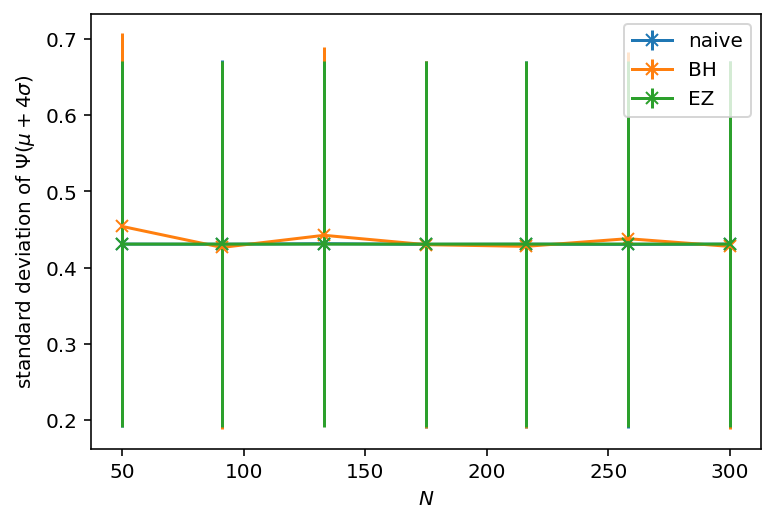

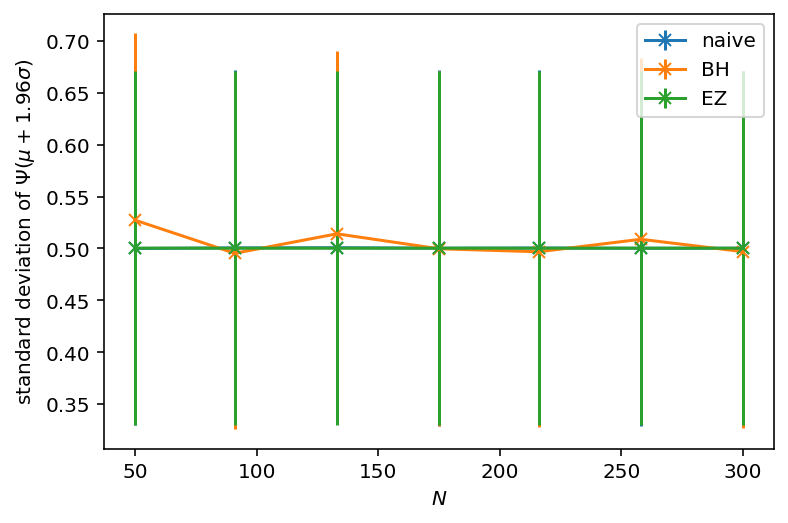

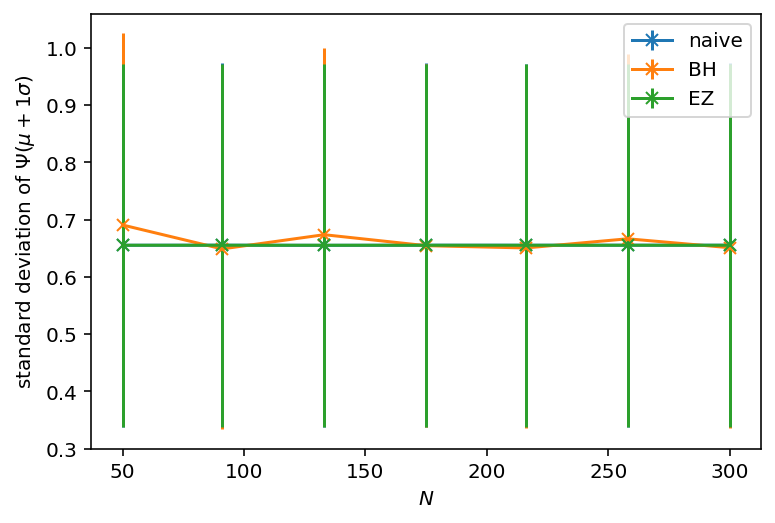

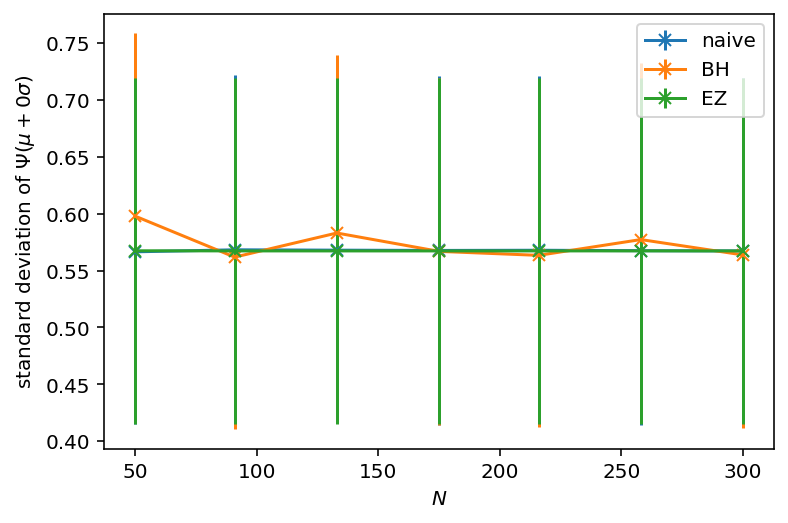

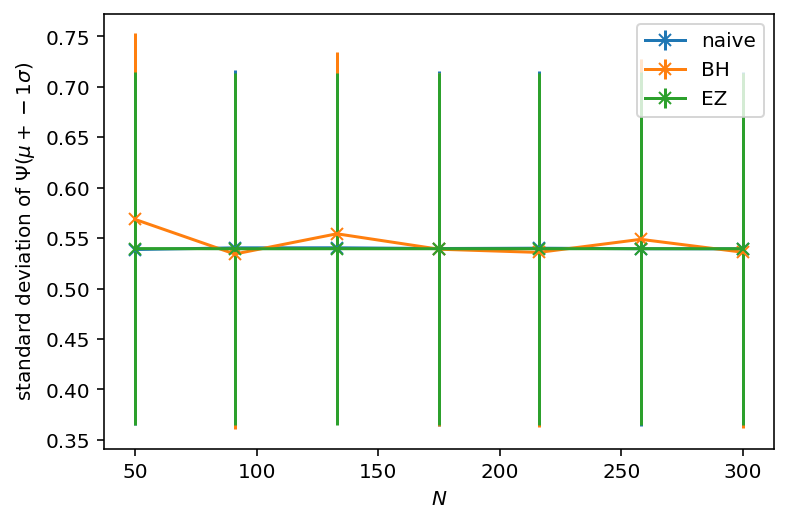

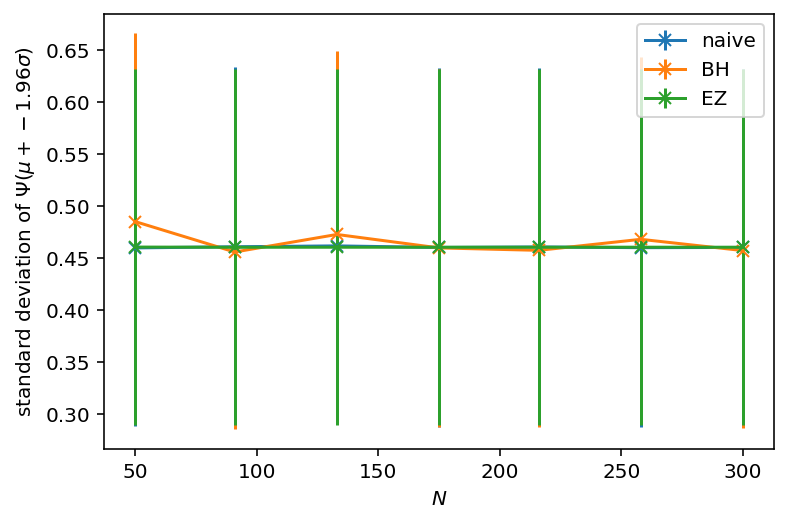

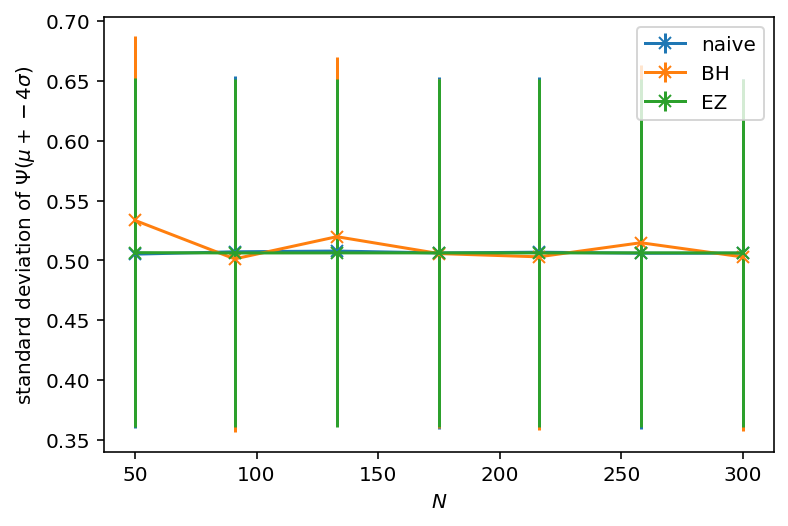

In [34]:
def mean_of_quant(arr, ind):
    return np.mean(arr[..., ind], axis=1)

for ind, yval in enumerate(cdf_sigmas):
    plt.figure()
    std = mean_of_quant(naives, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="naive")
    std = mean_of_quant(BHs, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="BH")
    std = mean_of_quant(EZs, ind)
    plt.errorbar(Ns, std.mean(axis=-1), std.std(axis=-1), std.std(axis=-1), marker="x", label="EZ")
    plt.xlabel("$N$");
    plt.ylabel(f"standard deviation of $\Psi(\mu + {yval}\sigma$)")
    plt.legend();
